In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'

In [2]:
df = pd.read_csv(path + '/30538.csv')
df_test = df['est_dist']
print(df_test)

0        2.71
1        2.22
2        2.90
3        2.54
4        2.71
         ... 
63432    2.90
63433    2.90
63434    2.08
63435    4.61
63436    3.09
Name: est_dist, Length: 63437, dtype: float64


In [3]:

file_list = ['30528.csv', '30538.csv','30547.csv','30549.csv','30550.csv','30556.csv','30557.csv']  # 추가로 불러올 파일이 있다면, 이 리스트에 파일명을 추가해주세요.

df_list = []

for file in file_list:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    
    # 'rssi'와 'est_dist','real_dist' 컬럼만 추출
    df = df[['rssi', 'est_dist','real_dist']]
    df_list.append(df)

# 모든 데이터프레임을 하나로 합치기
final_df = pd.concat(df_list)

# 결과를 새 csv 파일에 저장
final_df.to_csv(os.path.join(path, 'final_output.csv'), index=False)




In [4]:
rssi_data = df[['rssi','est_dist']]
rssi_data.to_csv('rssi_data.csv', index=False)


In [5]:
#df1 = pd.read_csv(path + '/rssi_data.csv')
#print(df1)

In [6]:
rssi_data_plt = pd.read_csv(path + '/final_output.csv')
print(rssi_data_plt)
rssi = rssi_data_plt['rssi']
est_dist  = rssi_data_plt['est_dist']


        rssi  est_dist  real_dist
0        -64      1.82          1
1        -62      1.59          1
2        -65      1.94          1
3        -64      1.82          1
4        -66      2.08          1
...      ...       ...        ...
418369   -76      4.04          7
418370   -75      3.78          7
418371   -86      7.84          7
418372   -75      3.78          7
418373   -84      6.87          7

[418374 rows x 3 columns]


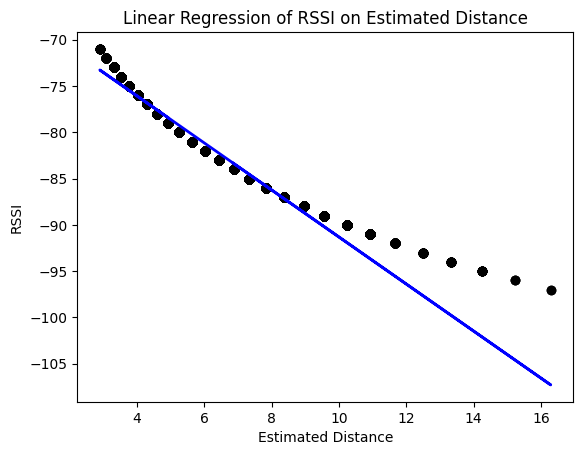

In [7]:
rssi_data = df[['rssi']]
est_distance = df[['est_dist']] 

# 선형 회귀 모델 생성 및 학습
model = LinearRegression().fit(est_distance,rssi_data)

# 회귀선을 위한 예측값 생성
rssi_pred = model.predict(est_distance)

# 원래 RSSI 데이터와 회귀선 그리기
plt.scatter(est_distance, rssi_data, color='black')
plt.plot(est_distance, rssi_pred, color='blue', linewidth=2)

# x축, y축 라벨 및 그래프 제목 설정
plt.xlabel('Estimated Distance')
plt.ylabel('RSSI')
plt.title('Linear Regression of RSSI on Estimated Distance')

plt.show()


Original RSSI Values: [-64, -62, -65, -64, -66, -64, -60, -65, -65, -63, -63, -62, -64, -62, -62, -65, -66, -64, -62, -62, -61, -64, -63, -60, -61, -67, -65, -61, -61, -63, -63, -61, -66, -64, -67, -60, -61, -67, -63, -63, -67, -65, -64, -61, -66, -64, -61, -62, -63, -63, -63, -66, -67, -61, -62, -67, -65, -65, -61, -66, -66, -63, -61, -65, -67, -63, -68, -65, -61, -61, -66, -66, -62, -67, -63, -66, -65, -64, -62, -66, -66, -63, -61, -66, -64, -66, -62, -62, -61, -66, -66, -63, -63, -65, -63, -63, -66, -63, -61, -61, -67, -61, -62, -63, -62, -62, -67, -63, -64, -63, -61, -64, -63, -60, -62, -66, -68, -65, -61, -61, -64, -63, -62, -62, -62, -66, -63, -65, -65, -66, -66, -66, -64, -67, -70, -63, -61, -66, -64, -60, -66, -66, -65, -63, -63, -61, -64, -60, -64, -64, -63, -64, -61, -63, -61, -65, -61, -66, -63, -61, -67, -64, -63, -62, -64, -61, -65, -66, -63, -64, -64, -66, -67, -65, -61, -65, -65, -64, -61, -63, -62, -65, -62, -67, -63, -65, -61, -66, -65, -64, -60, -66, -65, -65, -65, -6

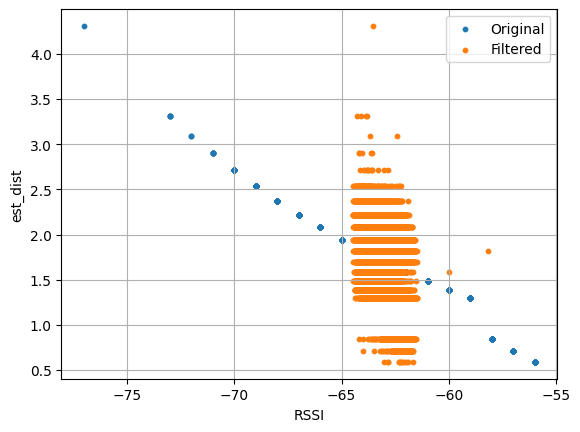

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(path + '/30528.csv')


class KalmanFilter():
    def __init__(self):
        self.Q = 1e-5  # Process noise covariance
        self.R = 0.1  # Measurement noise covariance
        self.x = 0  # Initial state (RSSI)
        self.P = 1  # Initial state covariance

    def filtering(self, measurement):
        # Prediction
        x_pred = self.x
        P_pred = self.P + self.Q

        # Update
        K = P_pred / (P_pred + self.R)
        self.x = x_pred + K * (measurement - x_pred)
        self.P = (1 - K) * P_pred

        return self.x
def apply_kalman_filter(file_path):
    # Read CSV file into a DataFrame

    # Extract the 'rssi' and 'est_dist' columns from the DataFrame
    rssi_data = []
    est_dist_data = []

    for i in range(67651): # 67650까지 인덱스를 포함하기 위해 67651까지 범위 설정
        rssi_data.append(df.loc[i, 'rssi'])
        est_dist_data.append(df.loc[i, 'est_dist'])
        rssi_data = df['rssi'].tolist()
        est_dist_data = df['est_dist'].tolist()


    # Kalman filter initialization
    kalman = KalmanFilter()

    # Apply Kalman filter to the RSSI data
    filtered_rssi = [kalman.filtering(rssi) for rssi in rssi_data]

    # Print the number of preprocessed data
    
    # Apply zero padding to the filtered data
    max_len = max(len(rssi_data), len(filtered_rssi))
    #rssi_data = np.pad(rssi_data, (0, max_len - len(rssi_data)), 'constant')
    filtered_rssi = np.pad(filtered_rssi, (0, max_len - len(filtered_rssi)), 'constant')

    # Output results
    print("Original RSSI Values:", rssi_data)
    print("Filtered (and zero-padded) RSSI Values:", filtered_rssi)
    print("Number of Preprocessed Data:", len(filtered_rssi))
    print("Number of Raw Data:", len(rssi_data))
    # Plotting the data
    plt.scatter(rssi_data, est_dist_data, label='Original',s=10)
    plt.scatter(filtered_rssi, est_dist_data, label='Filtered', s=10)
    plt.xlabel('RSSI')
    plt.ylabel('est_dist')
    plt.grid(True)
    plt.legend()
    plt.show()
    # Create a DataFrame from the filtered RSSI and estimated distance data
    df_filtered = pd.DataFrame({
        'filtered_rssi': filtered_rssi,
        'est_dist': est_dist_data
    })
    df_rssidata = pd.DataFrame({
        'rssi_data' : rssi_data,
        'est_dist':est_dist_data
    })
# Save the DataFrame to a CSV file
    df_filtered.to_csv(file_path + 'filtered_rssi_est_dist.csv', index=False)
    df_rssidata.to_csv(file_path + 'rssidata.csv', index=False)

# Specify the correct file path
file_path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'
apply_kalman_filter(file_path)




In [9]:
#Real distance 으로 추출한 RSSI 그래프 
import pandas as pd
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
files = ['30528.csv', '30538.csv', '30547.csv', '30549.csv', '30550.csv', '30556.csv', '30557.csv']
dataframes = []

for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)
# 데이터프레임 추출
rssi = pd.DataFrame(dataframes[0]['rssi'][0:63437])
realdist = pd.DataFrame(dataframes[0]['real_dist'][0:63437])
rssi1 = pd.DataFrame(dataframes[1]['rssi'][0:63437])
realdist1 = pd.DataFrame(dataframes[1]['real_dist'][0:63437])
rssi2 = pd.DataFrame(dataframes[2]['rssi'][0:55919])
realdist2 = pd.DataFrame(dataframes[2]['real_dist'][0:55929])
rssi3 = pd.DataFrame(dataframes[3]['rssi'][0:64332])
realdist3 = pd.DataFrame(dataframes[3]['real_dist'][0:64332])
rssi4 = pd.DataFrame(dataframes[4]['rssi'][0:54417])
realdist4 = pd.DataFrame(dataframes[4]['real_dist'][0:54417])
rssi5 = pd.DataFrame(dataframes[5]['rssi'][0:58881])
realdist5 = pd.DataFrame(dataframes[5]['real_dist'][0:58881])
rssi6 = pd.DataFrame(dataframes[6]['rssi'][0:53732])
realdist6 = pd.DataFrame(dataframes[6]['real_dist'][0:53732])
#데이터 프레임 합치기
# rssi 데이터 합치기
rssi_all = pd.concat([rssi, rssi1, rssi2, rssi3, rssi4, rssi5, rssi6], ignore_index=True , axis=0)

# realdist 데이터 합치기
realdist_all = pd.concat([realdist, realdist1, realdist2, realdist3, realdist4, realdist5, realdist6], ignore_index=True, axis = 0)

# 두 데이터를 하나의 데이터프레임으로 만들기
final_data = pd.DataFrame()
final_data['t_rssi'] = rssi_all
final_data['t_realdist'] = realdist_all

print(final_data)
#final_data.to_csv(file_path + 'rsssi_realdist.csv', index=False)

#데이터 프레임 각 컬럼 별 선언 
t_rssi = pd.DataFrame(final_data['t_rssi'])
t_realdist = pd.DataFrame(final_data['t_realdist'])

        t_rssi  t_realdist
0          -64           1
1          -62           1
2          -65           1
3          -64           1
4          -66           1
...        ...         ...
414150     -85           7
414151     -87           7
414152     -87           7
414153     -76           7
414154     -75           7

[414155 rows x 2 columns]


In [10]:
#Real distance 으로 추출한 RSSI 그래프 
import pandas as pd
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
files = ['30528.csv', '30538.csv', '30547.csv', '30549.csv', '30550.csv', '30556.csv', '30557.csv']
#print(dataframes[2])
dataframes = []
for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)
# 데이터프레임 추출
rssi = pd.DataFrame(dataframes[0]['rssi'][0:63437])
estdist = pd.DataFrame(dataframes[0]['est_dist'][0:63437])
txpower = pd.DataFrame(dataframes[0]['txpower'][0:63437])

rssi1 = pd.DataFrame(dataframes[1]['rssi'][0:63437])
estdist1 = pd.DataFrame(dataframes[1]['est_dist'][0:63437])
txpower1 = pd.DataFrame(dataframes[1]['txpower'][0:63437])
#print(estdist1)
#print(txpower1)
rssi2 = pd.DataFrame(dataframes[2]['rssi'][0:55919])
estdist2 = pd.DataFrame(dataframes[2]['est_dist'][0:55929])
txpower2 = pd.DataFrame(dataframes[1]['txpower'][0:63437])

rssi3 = pd.DataFrame(dataframes[3]['rssi'][0:64332])
estdist3 = pd.DataFrame(dataframes[3]['est_dist'][0:64332])
txpower3 = pd.DataFrame(dataframes[1]['txpower'][0:63437])

rssi4 = pd.DataFrame(dataframes[4]['rssi'][0:54417])
estdist4 = pd.DataFrame(dataframes[4]['est_dist'][0:54417])
txpower4 = pd.DataFrame(dataframes[1]['txpower'][0:63437])

rssi5 = pd.DataFrame(dataframes[5]['rssi'][0:58881])
estdist5 = pd.DataFrame(dataframes[5]['est_dist'][0:58881])
txpower5 = pd.DataFrame(dataframes[1]['txpower'][0:63437])

rssi6 = pd.DataFrame(dataframes[6]['rssi'][0:53732])
estdist6 = pd.DataFrame(dataframes[6]['est_dist'][0:53732])
txpower6 = pd.DataFrame(dataframes[1]['txpower'][0:63437])

#데이터 프레임 합치기
# rssi 데이터 합치기
rssi_all = pd.concat([rssi, rssi1, rssi2, rssi3, rssi4, rssi5, rssi6], ignore_index=True , axis=0)
#print(realdist)
# estdist 데이터 합치기
estdist_all = pd.concat([estdist, estdist1, estdist2, estdist3, estdist4, estdist5, estdist6], ignore_index=True, axis = 0)

#tx_power 데이터 합치기
txpower_all = pd.concat([txpower, txpower1, txpower2, txpower3, txpower4, txpower5, txpower6], ignore_index=True, axis = 0)

# 두 데이터를 하나의 데이터프레임으로 만들기
final_data = pd.DataFrame()
final_data['t_rssi'] = rssi_all
final_data['t_estdist'] = estdist_all
final_data['txpower'] = txpower_all
print(txpower_all)
print(len(txpower_all))
print(len(t_rssi))
#print(final_data)
file_path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'
final_data.to_csv(file_path + 'test.csv', index=False)

#데이터 프레임 각 컬럼 별 선언 
t_rssi = pd.DataFrame(final_data['t_rssi'])
t_estdist = pd.DataFrame(final_data['t_estdist'])
t_power = pd.DataFrame(final_data['txpower'])
print(final_data)
print(len(final_data))
print(t_estdist)
print(t_power)

        txpower
0           -59
1           -59
2           -59
3           -59
4           -59
...         ...
444054      -59
444055      -59
444056      -59
444057      -59
444058      -59

[444059 rows x 1 columns]
444059
414155
        t_rssi  t_estdist  txpower
0          -64       1.82      -59
1          -62       1.59      -59
2          -65       1.94      -59
3          -64       1.82      -59
4          -66       2.08      -59
...        ...        ...      ...
414150     -85       7.34      -59
414151     -87       8.38      -59
414152     -87       8.38      -59
414153     -76       4.04      -59
414154     -75       3.78      -59

[414155 rows x 3 columns]
414155
        t_estdist
0            1.82
1            1.59
2            1.94
3            1.82
4            2.08
...           ...
414150       7.34
414151       8.38
414152       8.38
414153       4.04
414154       3.78

[414155 rows x 1 columns]
        txpower
0           -59
1           -59
2           -59
3     

In [ ]:
#일단 보류 
for i in range(0, 41456):
    d = 10**((final_data[i]['txpower'] - final_data[i]['t_rssi'])/(10 * 2))
    final_data[i]['d'] = d

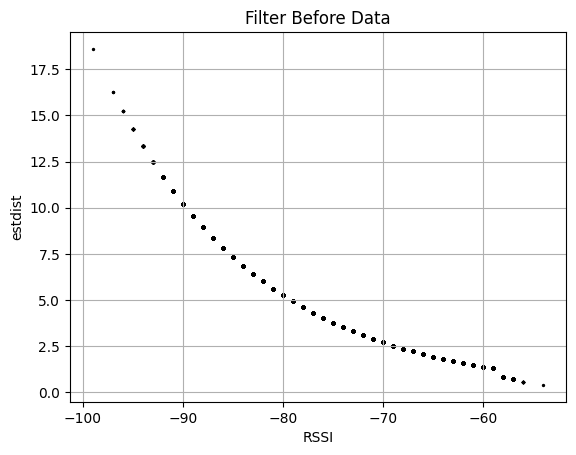

In [ ]:
plt.scatter(t_rssi, t_estdist.values.reshape(-1,1), color='k', s=2)
plt.title('Filter Before Data')
plt.xlabel('RSSI')
plt.ylabel('estdist')
plt.grid(True)
plt.show()


In [ ]:
#RSSI 측정치를 이용하여 거리 계산할때 사용한 값으로 -0.2878307 무선신호 손실률 
log_d = -0.02878307 * t_rssi -1.5813873130922256
print(log_d)

          t_rssi
0       0.260729
1       0.203163
2       0.289512
3       0.260729
4       0.318295
...          ...
414150  0.865174
414151  0.922740
414152  0.922740
414153  0.606126
414154  0.577343

[414155 rows x 1 columns]


In [ ]:
#평균 최소 제곱법 RMSE 
#밑에 고안해야하는 부분을 고안하지 않고 우선은 기존의 코드로 구현해 본 부분
#여기서 가중치값이 곧 무선 신호 손실률과 같은건지 확인해야 할 필요성이 있음


이전 코드 
x_train : rssi 
proposed_d => log_d 에서 log를 없앤 값 


여기서 고안해야 하는 점
log_d = -0.02878307 * t_rssi -1.5813873130922256
print(log_d)

-0.0287307 는 가중치 값이고, -1... 그건 절편인데
종속 변수를 예측할ㅇ 수 있게 하는거고 , 
모델의 주어진 데이터로부터 학습한 선형 관계를 표현하고 있는건데

그러니깐 회귀 모델은 주어진 독립변수와 그에 대응하는 가중치들을 이용하여 종속 변수를 예측하는 선형관계를 학습하는 건데
여기서 최소제곱법하고 경사하강법 방법으로 최적화 알고리즘으로 가중치랑 절편을 구할 수가 있는데,
나는 그냥 이전에 있는 코드로 한거자나 그래서 
이 데이터에 맞는 가중치 값 하고 절편을 구할 필요성이 있다
그래서 최적화 알고리즘을 써서 해봐야함


x_train, x_test, y_train y_test
train test split 
train 훈련용 코드 / 학습용 코드 split 하는 과정. 
x_train, x_test, y_train, y_test 
x_train은 해당 데이터 셋에서 rssi 값
x_test 은 --- log_d (distance 에 log 로그값을 취한 값)
train_size = 0.9 는 90 이 학습용 데이터, 10이 훈련용 데이터로 나누고 (이 부분은 일반적인 경우에 해당이 됨)
나누는 이유가, overfitting 과적합을 방지하기 위해서 사용하고 있음
모델에서, 새로운 데이터에 대한 예측 성능이 떨어지는 현상을 과적합 (overfitting ) 현상이라고 한다

random_state = 42
시드값, 코드 여러번 실행하였을때도 동일한 결과를 얻을 수 있게 하기 위해 사용 

x_train numpy 배열의 크기를 알려주는 함수로 shape 함수가 쓰이고 있음. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(t_rssi, log_d, train_size=0.9, random_state=42)


#X_train1, X_test1, y_train1, y_test1 = train_test_split(t_rssi, t_dist, train_size=0.9, random_state=42) #rssi - distance model

print(len(X_train),len(X_test))

# print(X_test)
# print(y_test)
#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

372739 41416
(372739, 1)
(372739, 1)
(41416, 1)
(41416, 1)
(372739, 1)


In [ ]:
#선형 회귀 모델을 사용해서 데이터 학습하고 , 그 결과를 출력하는 code
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('기울기: ',model.coef_,'절편: ', model.intercept_)
accuracy = model.score(X_test, y_test)
print(accuracy)


NameError: name 'LinearRegression' is not defined

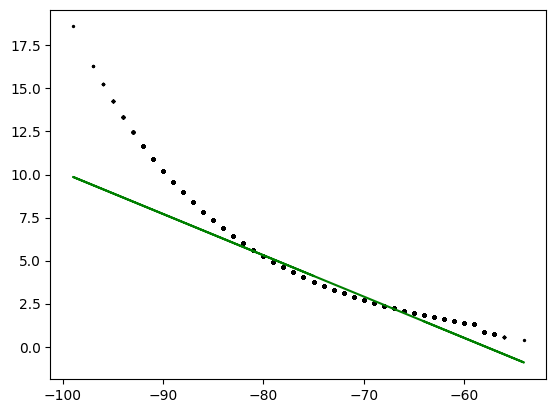

In [ ]:
import numpy as np
model = LinearRegression()
model.fit(t_rssi.values.reshape(-1, 1), t_estdist)
data  = t_rssi.values.reshape(-1,1)
pred = model.predict(data)
plt.scatter(t_rssi, t_estdist.values.reshape(-1, 1), color='k', s=2)
plt.plot(t_rssi, pred, color='green')
plt.show()

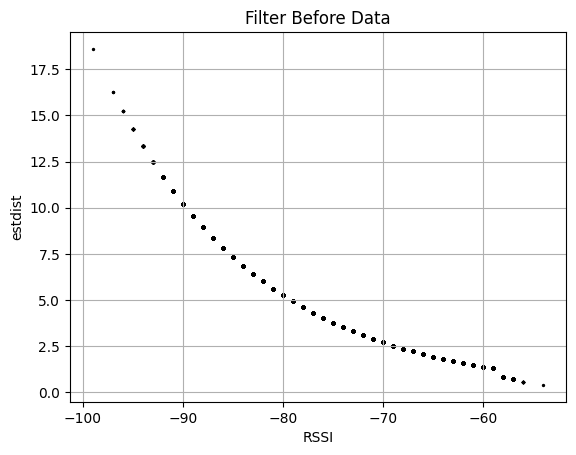

In [ ]:
plt.scatter(t_rssi, t_estdist.values.reshape(-1,1), color='k', s=2)
#plt.plot(X_test.values, y_pred, 'r-')
plt.title('Filter Before Data')
plt.xlabel('RSSI')
plt.ylabel('estdist')
plt.grid(True)
plt.show()

Original RSSI Values: [-64, -62, -65, -64, -66, -64, -60, -65, -65, -63, -63, -62, -64, -62, -62, -65, -66, -64, -62, -62, -61, -64, -63, -60, -61, -67, -65, -61, -61, -63, -63, -61, -66, -64, -67, -60, -61, -67, -63, -63, -67, -65, -64, -61, -66, -64, -61, -62, -63, -63, -63, -66, -67, -61, -62, -67, -65, -65, -61, -66, -66, -63, -61, -65, -67, -63, -68, -65, -61, -61, -66, -66, -62, -67, -63, -66, -65, -64, -62, -66, -66, -63, -61, -66, -64, -66, -62, -62, -61, -66, -66, -63, -63, -65, -63, -63, -66, -63, -61, -61, -67, -61, -62, -63, -62, -62, -67, -63, -64, -63, -61, -64, -63, -60, -62, -66, -68, -65, -61, -61, -64, -63, -62, -62, -62, -66, -63, -65, -65, -66, -66, -66, -64, -67, -70, -63, -61, -66, -64, -60, -66, -66, -65, -63, -63, -61, -64, -60, -64, -64, -63, -64, -61, -63, -61, -65, -61, -66, -63, -61, -67, -64, -63, -62, -64, -61, -65, -66, -63, -64, -64, -66, -67, -65, -61, -65, -65, -64, -61, -63, -62, -65, -62, -67, -63, -65, -61, -66, -65, -64, -60, -66, -65, -65, -65, -6

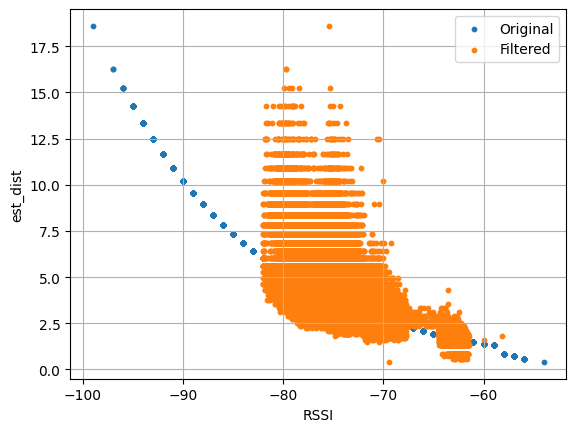

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(path + '/test.csv')


class KalmanFilter():
    def __init__(self):
        self.Q = 1e-5  # Process noise covariance
        self.R = 0.1  # Measurement noise covariance
        self.x = 0  # Initial state (RSSI)
        self.P = 1  # Initial state covariance

    def filtering(self, measurement):
        # Prediction
        x_pred = self.x
        P_pred = self.P + self.Q

        # Update
        K = P_pred / (P_pred + self.R)
        self.x = x_pred + K * (measurement - x_pred)
        self.P = (1 - K) * P_pred

        return self.x
def apply_kalman_filter(file_path):
    # Read CSV file into a DataFrame

    # Extract the 'rssi' and 'est_dist' columns from the DataFrame
    rssi_data = []
    est_dist_data = []

    for i in range(67651): # 67650까지 인덱스를 포함하기 위해 67651까지 범위 설정
        rssi_data.append(df.loc[i, 't_rssi'])
        est_dist_data.append(df.loc[i, 't_estdist'])
        rssi_data = df['t_rssi'].tolist()
        est_dist_data = df['t_estdist'].tolist()


    # Kalman filter initialization
    kalman = KalmanFilter()

    # Apply Kalman filter to the RSSI data
    filtered_rssi = [kalman.filtering(rssi) for rssi in rssi_data]

    # Print the number of preprocessed data
    
    # Apply zero padding to the filtered data
    max_len = max(len(rssi_data), len(filtered_rssi))
    #rssi_data = np.pad(rssi_data, (0, max_len - len(rssi_data)), 'constant')
    filtered_rssi = np.pad(filtered_rssi, (0, max_len - len(filtered_rssi)), 'constant')

    # Output results
    print("Original RSSI Values:", rssi_data)
    print("Filtered (and zero-padded) RSSI Values:", filtered_rssi)
    print("Number of Preprocessed Data:", len(filtered_rssi))
    print("Number of Raw Data:", len(rssi_data))
    # Plotting the data
    plt.scatter(rssi_data, est_dist_data, label='Original',s=10)
    plt.scatter(filtered_rssi, est_dist_data, label='Filtered', s=10)
    plt.xlabel('RSSI')
    plt.ylabel('est_dist')
    plt.grid(True)
    plt.legend()
    plt.show()
    # Create a DataFrame from the filtered RSSI and estimated distance data
    df_filtered = pd.DataFrame({
        'filtered_rssi': filtered_rssi,
        'est_dist': est_dist_data
    })
    df_rssidata = pd.DataFrame({
        'rssi_data' : rssi_data,
        'est_dist':est_dist_data
    })
# Save the DataFrame to a CSV file
    df_filtered.to_csv(file_path + 'filtered_rssi_est_dist.csv', index=False)
    df_rssidata.to_csv(file_path + 'rssidata.csv', index=False)

# Specify the correct file path
file_path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'
apply_kalman_filter(file_path)




In [ ]:
print()